# <span style="color:blue"> Numerical Simulation Laboratory (NSL) </span>
    
##  <span style="color:blue"> Edoardo Baraldi - Notebook 4 </span>  

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

## Equilibration - Solid

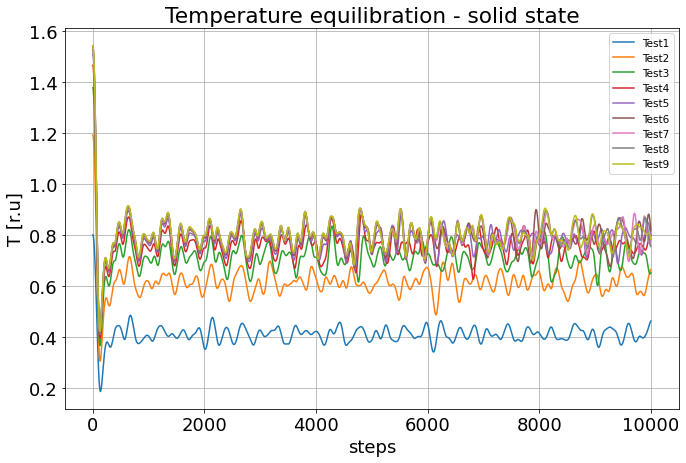

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math

#define reduced units
k_b = 1.380649 * 10**(-23) #(J/K)ù
epsilon = 120 * k_b  #(joule)
sigma = 0.34 * 10**(-9) #(m)
m = 6.634 * 10**(-26) #(kg)

plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"]= (11,7)

x = np.arange(10000)
temp_solid = []  # create an empty list to store the data
for i in range(1, 10):
    data = np.loadtxt("equilib_folder/solid_equilib_test" + str(i) + ".dat", unpack=True, usecols=(1))
    temp_solid.append(data)  # add the data to the list

for i in range(1,10):
    plt.plot(x, temp_solid[i-1], label="Test"+str(i))
    plt.legend(loc=1, fontsize='xx-small')
    plt.xlabel("steps")
    plt.ylabel("T [r.u]")
    plt.title("Temperature equilibration - solid state")

plt.grid(True)
plt.show()


## Equilibration - Liquid

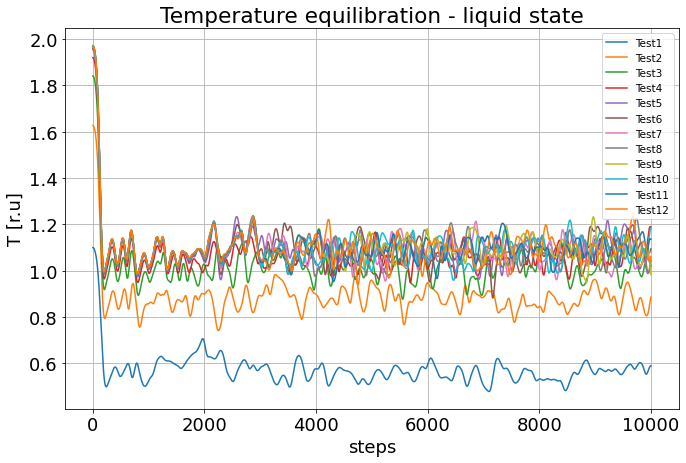

In [3]:
x = np.arange(10000)
temp_liquid = []  # create an empty list to store the data
for i in range(1, 13):
    data = np.loadtxt("equilib_folder/liquid_equilib_test" + str(i) + ".dat", unpack=True, usecols=(1))
    temp_liquid.append(data)  # add the data to the list

for i in range(1,13):
    plt.plot(x, temp_liquid[i-1], label="Test"+str(i))
    plt.legend(loc=1, fontsize='xx-small')
    plt.xlabel("steps")
    plt.ylabel("T [r.u]")
    plt.title("Temperature equilibration - liquid state")

plt.grid(True)
plt.show()

## Equilibration Gas

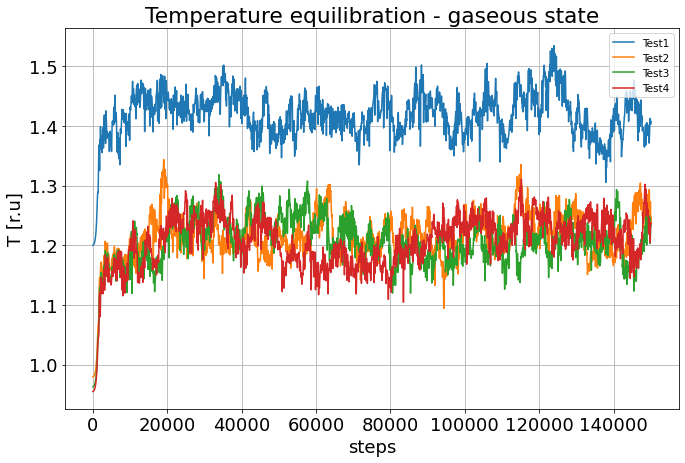

In [4]:
x = np.arange(150000)
temp_gas = []  # create an empty list to store the data
for i in range(1, 5):
    data = np.loadtxt("equilib_folder/gas_equilib_test" + str(i) + ".dat", unpack=True, usecols=(1))
    temp_gas.append(data)  # add the data to the list

for i in range(1,5):
    plt.plot(x, temp_gas[i-1], label="Test"+str(i))
    plt.legend(loc=1, fontsize='xx-small')
    plt.xlabel("steps")
    plt.ylabel("T [r.u]")
    plt.title("Temperature equilibration - gaseous state")

plt.grid(True)
plt.show()

I grafici mostrano i tentativi di equilibrazione della temperatura per lo stato solido, liquido e gassoso nel caso di un modello di dinamica molecolare di un sistema di 108 particelle di Argon. L'ipotesi principale del modello è quella di ensamble microcanonico e il codice di evoluzione del sistema adottato si basa sul Algoritmo di Verlet.

La configurazione iniziale per le simulazioni nei tre stati dell'Argon è sempre quella di in cristallo perfetto fcc. Essendo questo configurazione un minimo del potenziale del sistema, quando il sistema evolve essa inizierà a variare. L'ipotesi di ensamble microcanonico ha come conseguenza il fatto che sia il numero di particelle $N$ che l'energia totale del sistema rimangano costanti. Affinchè quest'ultima non vari, l'energia potenziale e quella cinetica si devono compensare esattamente. Se per lo stato liquido e qeullo solido l'energia potenziale aumenta a causa dell'evoluzione del sistema, allora necessariamente l'energia cinetica e la temperatura decrescono. 
Questo non vale nel caso gassoso, è infatti facile notare come la temperatura all'avanzare del tempo(stpes in questo caso) aumenta. Questo perchè il potenziale del sistema è quello di Lennard-Jones che risulta essere negativo ed attrattivo per grandi distanze, porta le particelle verso il minimo della buca nei momenti iniaizli dell'evoluzione del sistema. Per compensare la diminuizione dell'energia potenziale, l'energia cinetica e la temepratura crescono fino a saturare quando l'energia totale si assesta intorno al un valore costante.
Siccome la simulazione è stata eseguita su una scatola di dimensione $L_{box}=(N_{part}/\rho)^{1/3}$, più la densità del sistema riulsta bassa, più la larghezza della scatola risulta grande e conseguentemente anche la distanza massima di interazione tra le particelle. Se confrontiamo le densità dei tre vari stati: $\rho_{solid}^{\star}=1.1$ $\rho_{liquid}^{\star}=0.8$ $\rho_{gas}^{\star}=0.05$, si nota come la densità dello stato gassoso è molto più piccola (in unità ridotte) delle denistà degli altri due stati dell'Argon. Ciò significa che la distanza media tra particelle gassose è più grande della distanza tra particelle negli altri stati.

Ho effettuato l'equilibrazione testando diverse temperature iniziali per i vari stati dell'Argon. Siccome l'ensamble microcanonico richiede solo che l'energia totale rimanga costante e non la temperatura. Ho perciò fatto variare le diverse temperature di partenza per lo stato solido, liquido e gassoso in modo tale che, evolvendo, il sistema si satbilizzi intorno alla temperatura desiderata. Per far questo ho fatto evolvere il sistema per $10^4 $ steps per la fase solida e quella liquid e per $1.5\cdot10^5$ steps per la fase gassosa (poichè in questa fase il sistema è molto più disordinato e ha bisogno di più tempo per eqilibrarsi), registrando le temperature. Ad ogni test ho calcolato la temperatura medio sul tempo di equilibrazione (su tutti gli steps) ed  l'ho sottratta alla temperatura voluta. Il valore ottenuto è stato sommato alla temperatura di partenza per ottenere una nuova temperatura iniziale. Questo procedimento è andato avanti fino a quando la differenza fra la temperatura di riferimento e quella media fu minore di $0.002$ (valore arbitrario). Le temperature raggiunte quindi per ogni fase sono:
$$T_{solid}^{\star}=1.54\:r.u \qquad  T_{liquid}^{\star}=1.97 \:r.u \qquad T_{gas}^{\star}=0.95 \:r.u \: .$$
Per tenere conto del tempo necessario ad equilibrare il sistema, nelle simulazioni successive ho valutato le propretà fisiche solo per gli step con una temperatura compreso entro un $10%$ della temperatura di riferimento.

## Convert from r.u to SI

Le unità ridotte sono utili in problemi di dinamica molecolare perchè risultano essere adimensionali ed evitano a livello computazionale problemi di overflow o underflow. Per una simulazione del comportamento dell'Argon, per passare da un sistema all'altro, le grandezze fondamentali risultano essere: $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu.

Il legame tra le unità ridotte ed unità di misura SI risulta essere:
1. Lunghezza $r=r^{\star}\sigma$.
2. Temperatura $T=T^{\star}\epsilon/k_B$.
3. Energia $E=E^{\star}\epsilon$.
4. Pressione $P=P^{\star}\sigma^3/\epsilon$.
5. Densità $\rho=\rho^{\star}/\sigma^3$.

## Argon Simulations in different states

### <span style = "color:green" > Solid state </span>

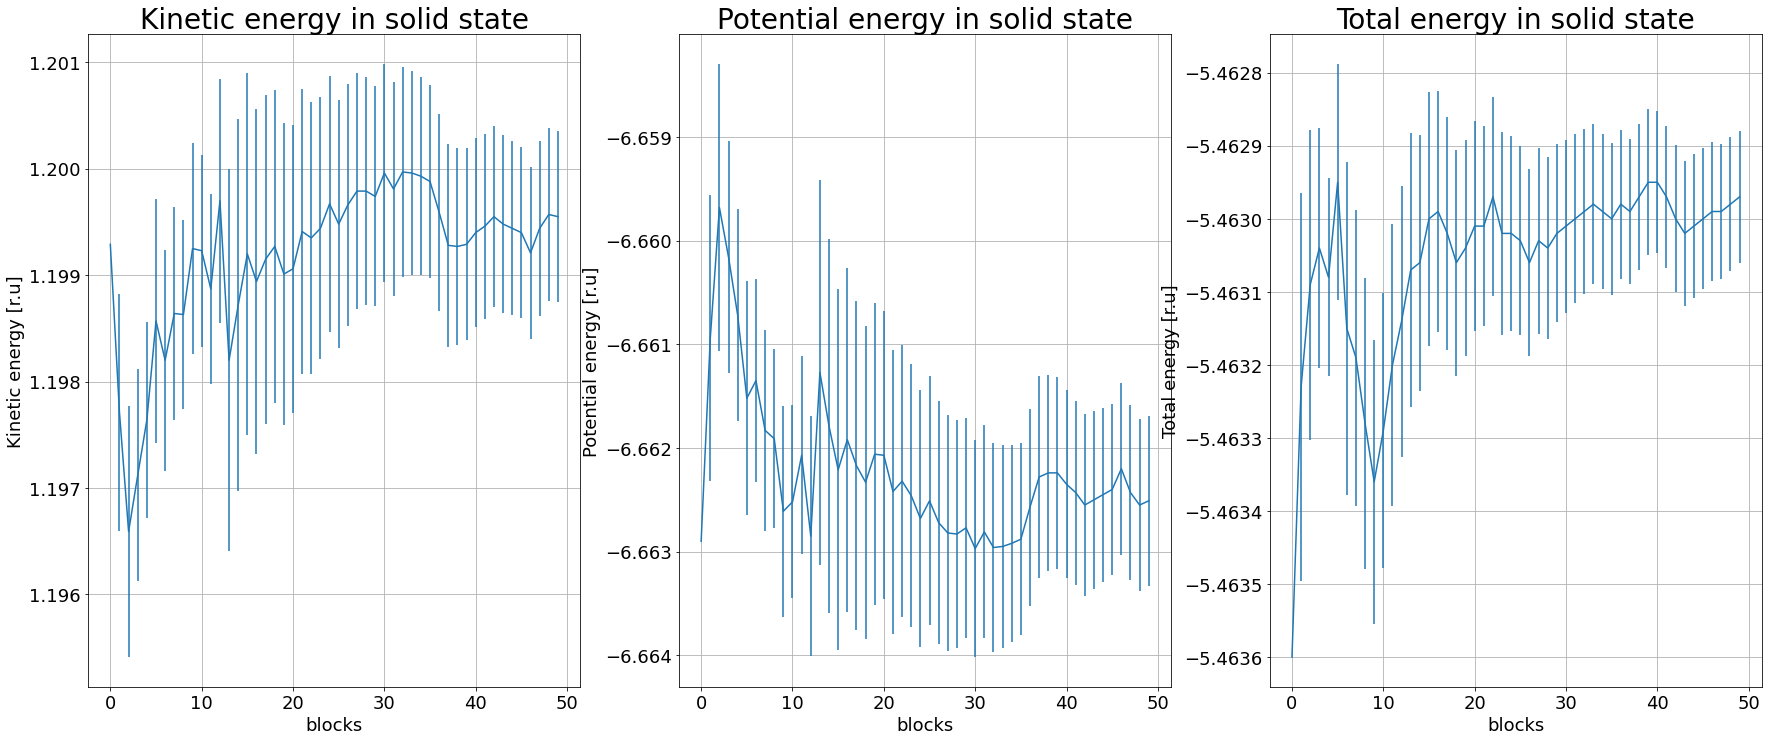

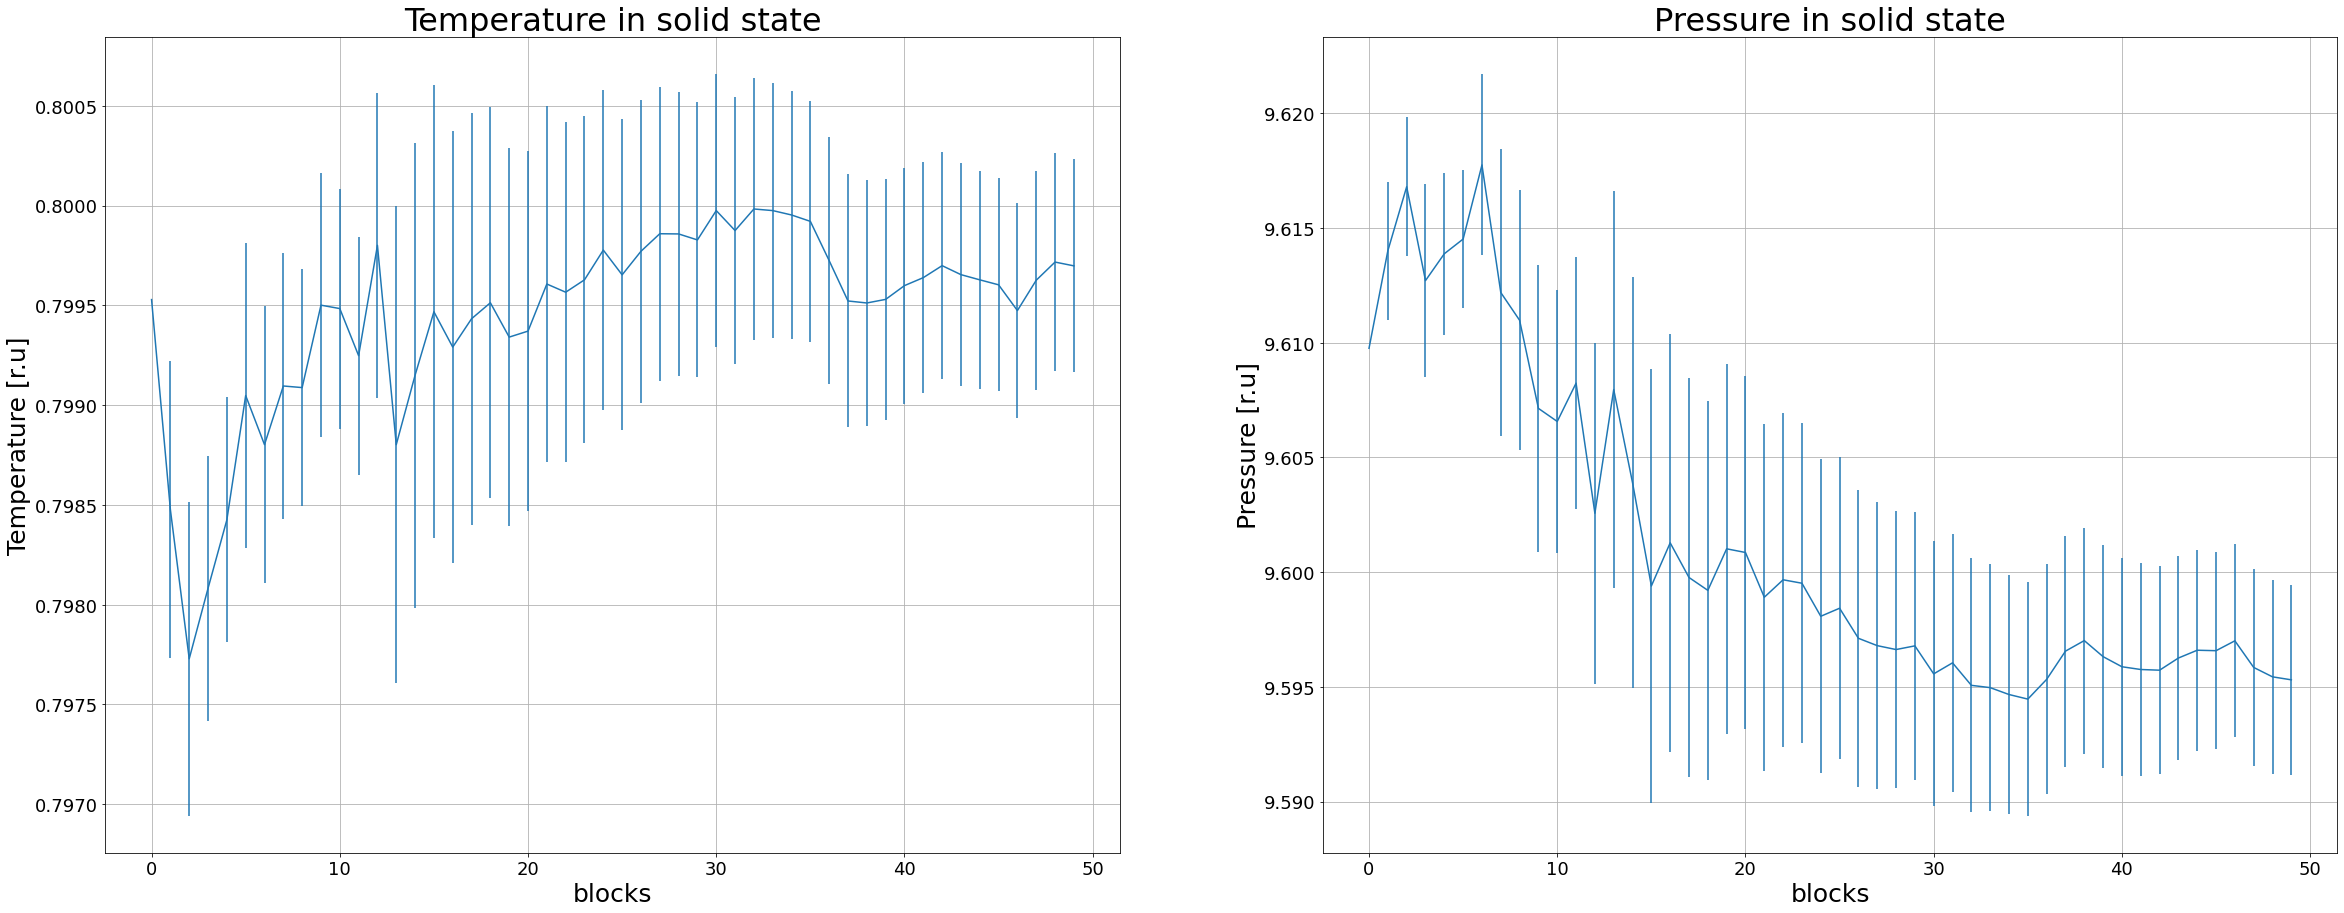

In [8]:
ekin_solid, ekin_err_s = np.loadtxt("output_folder/solid_ekin.dat", unpack=True, usecols=(2,3))
etot_solid, etot_err_s = np.loadtxt("output_folder/solid_etot.dat", unpack=True, usecols=(2,3))
epot_solid, epot_err_s = np.loadtxt("output_folder/solid_epot.dat", unpack=True, usecols=(2,3))
temp_solid, temp_err_s = np.loadtxt("output_folder/solid_temp.dat", unpack=True, usecols=(2,3))
pres_solid, pres_err_s = np.loadtxt("output_folder/solid_pres.dat", unpack=True, usecols=(2,3))

blocks = np.arange(50)

fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(30 , 12))
ax0.errorbar(blocks, ekin_solid , yerr= ekin_err_s)
ax1.errorbar(blocks, epot_solid , yerr= epot_err_s)
ax2.errorbar(blocks, etot_solid , yerr= etot_err_s)

ax0.set_ylabel("Kinetic energy [r.u]", fontsize=18)
ax1.set_ylabel("Potential energy [r.u]", fontsize=18)
ax2.set_ylabel("Total energy [r.u]", fontsize=18)
ax0.set_title("Kinetic energy in solid state",  fontsize=28)
ax1.set_title("Potential energy in solid state",  fontsize=28)
ax2.set_title("Total energy in solid state",  fontsize=28)

for i in range(3):
    globals()['ax'+str(i)].set_xlabel("blocks", fontsize=18)
    globals()['ax'+str(i)].grid(True)

fig, [ax4, ax5] = plt.subplots(1,2, figsize=(40 , 15))
ax4.errorbar(blocks, temp_solid , yerr= temp_err_s)
ax5.errorbar(blocks, pres_solid , yerr= pres_err_s)

ax4.set_ylabel("Temperature [r.u]", fontsize=25)
ax5.set_ylabel("Pressure [r.u]", fontsize=25)
ax4.set_title("Temperature in solid state",  fontsize=32)
ax5.set_title("Pressure in solid state",  fontsize=32)
for i in range(2):
    globals()['ax'+str(i+4)].set_xlabel("blocks", fontsize=25)
    globals()['ax'+str(i+4)].grid(True)

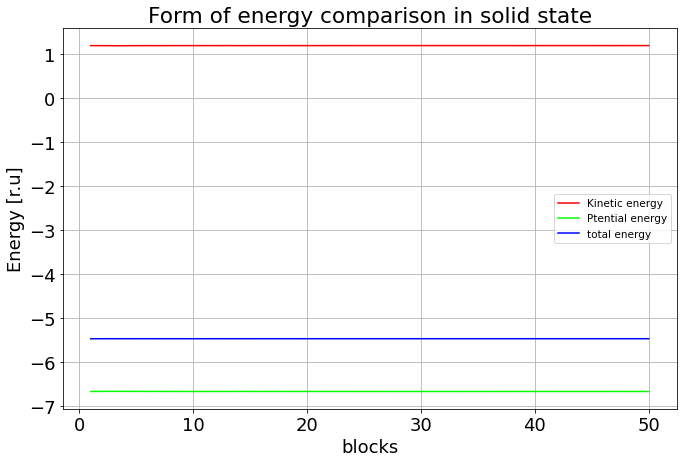

In [20]:
plt.plot(blocks+1, ekin_solid, label="Kinetic energy", color= "red")
plt.plot(blocks+1, epot_solid, label="Ptential energy", color= "lime")
plt.plot(blocks+1, etot_solid, label="total energy", color= "blue")

plt.legend(loc=5, fontsize='xx-small')
plt.xlabel("blocks")
plt.ylabel("Energy [r.u]")
plt.title("Form of energy comparison in solid state")
plt.grid(True)
plt.show()

Dopo aver completato il codice inserendo anche il calcolo della pressione statistica, ho simulato l'evoluzione di un sistiema di dinamica molecolare di Argon allo stato solido ad una temperatura $T=0.8\:r.u = 96 \: K$, una densità $\rho = 1.1 \:r.u \approx 28\cdot 10^{27} \:m^{-3}$ ed un raggio di cut-off $r_c = 2.2 \: r.u \approx 0.75 \:nm$. 

I primi grafici mostrano i valori medi, ottenuti tramite media blocchi con $2\cdot10^3$ estrazioni e $50$ blocchi, di: pressione, temperatura, energia potenziale, energia cinetica ed energia totale. 

Il secondo grafico mostra un confronto delle tre energie e come esse rimangano costanti per ogni blocco, una volta evvenuta l'equilibrazione.

### <span style = "color:green" > Liquid state </span>

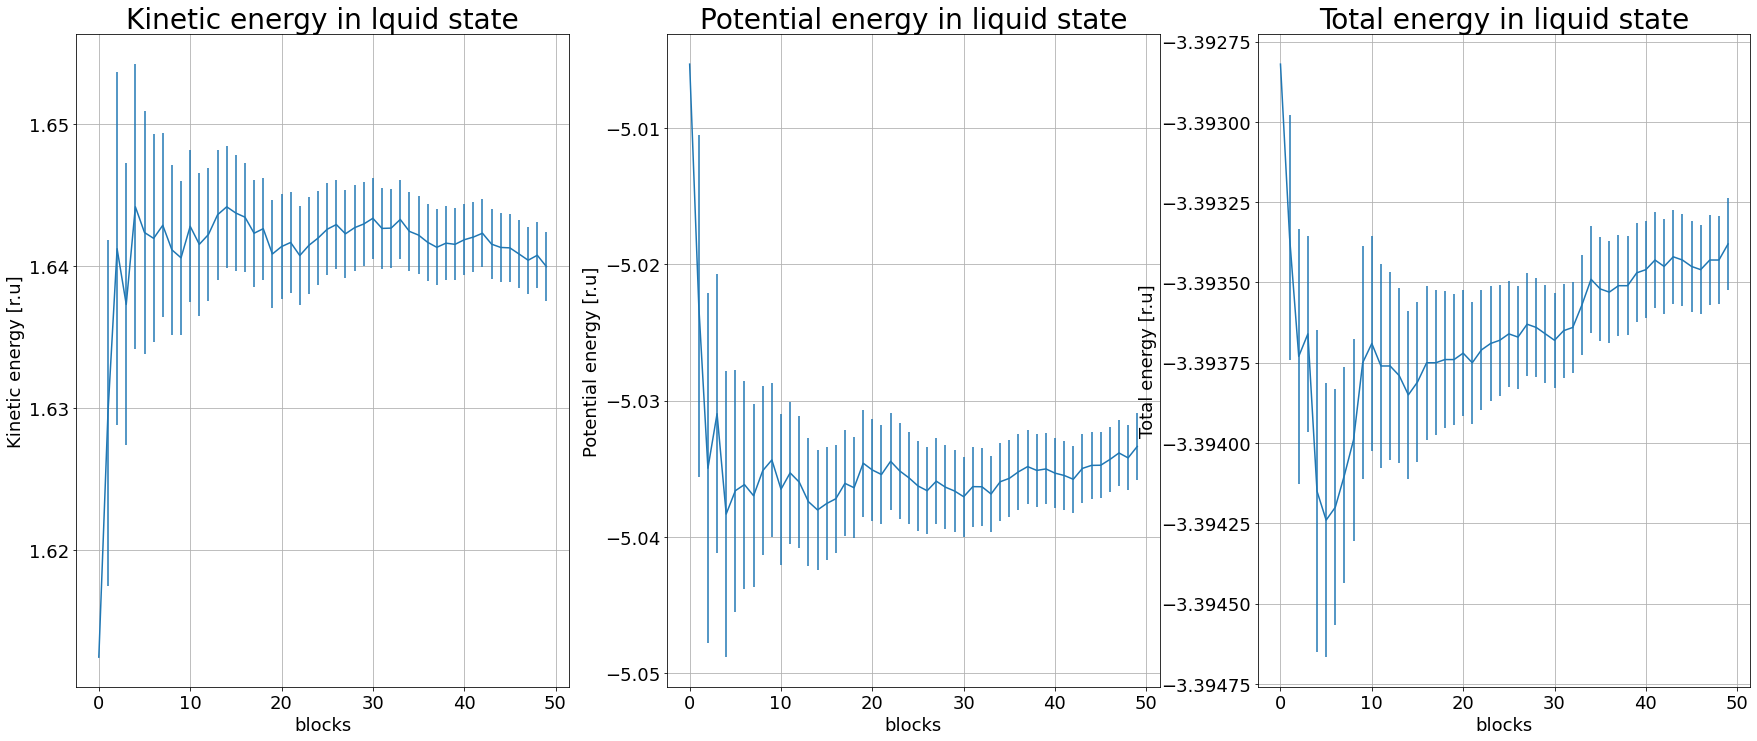

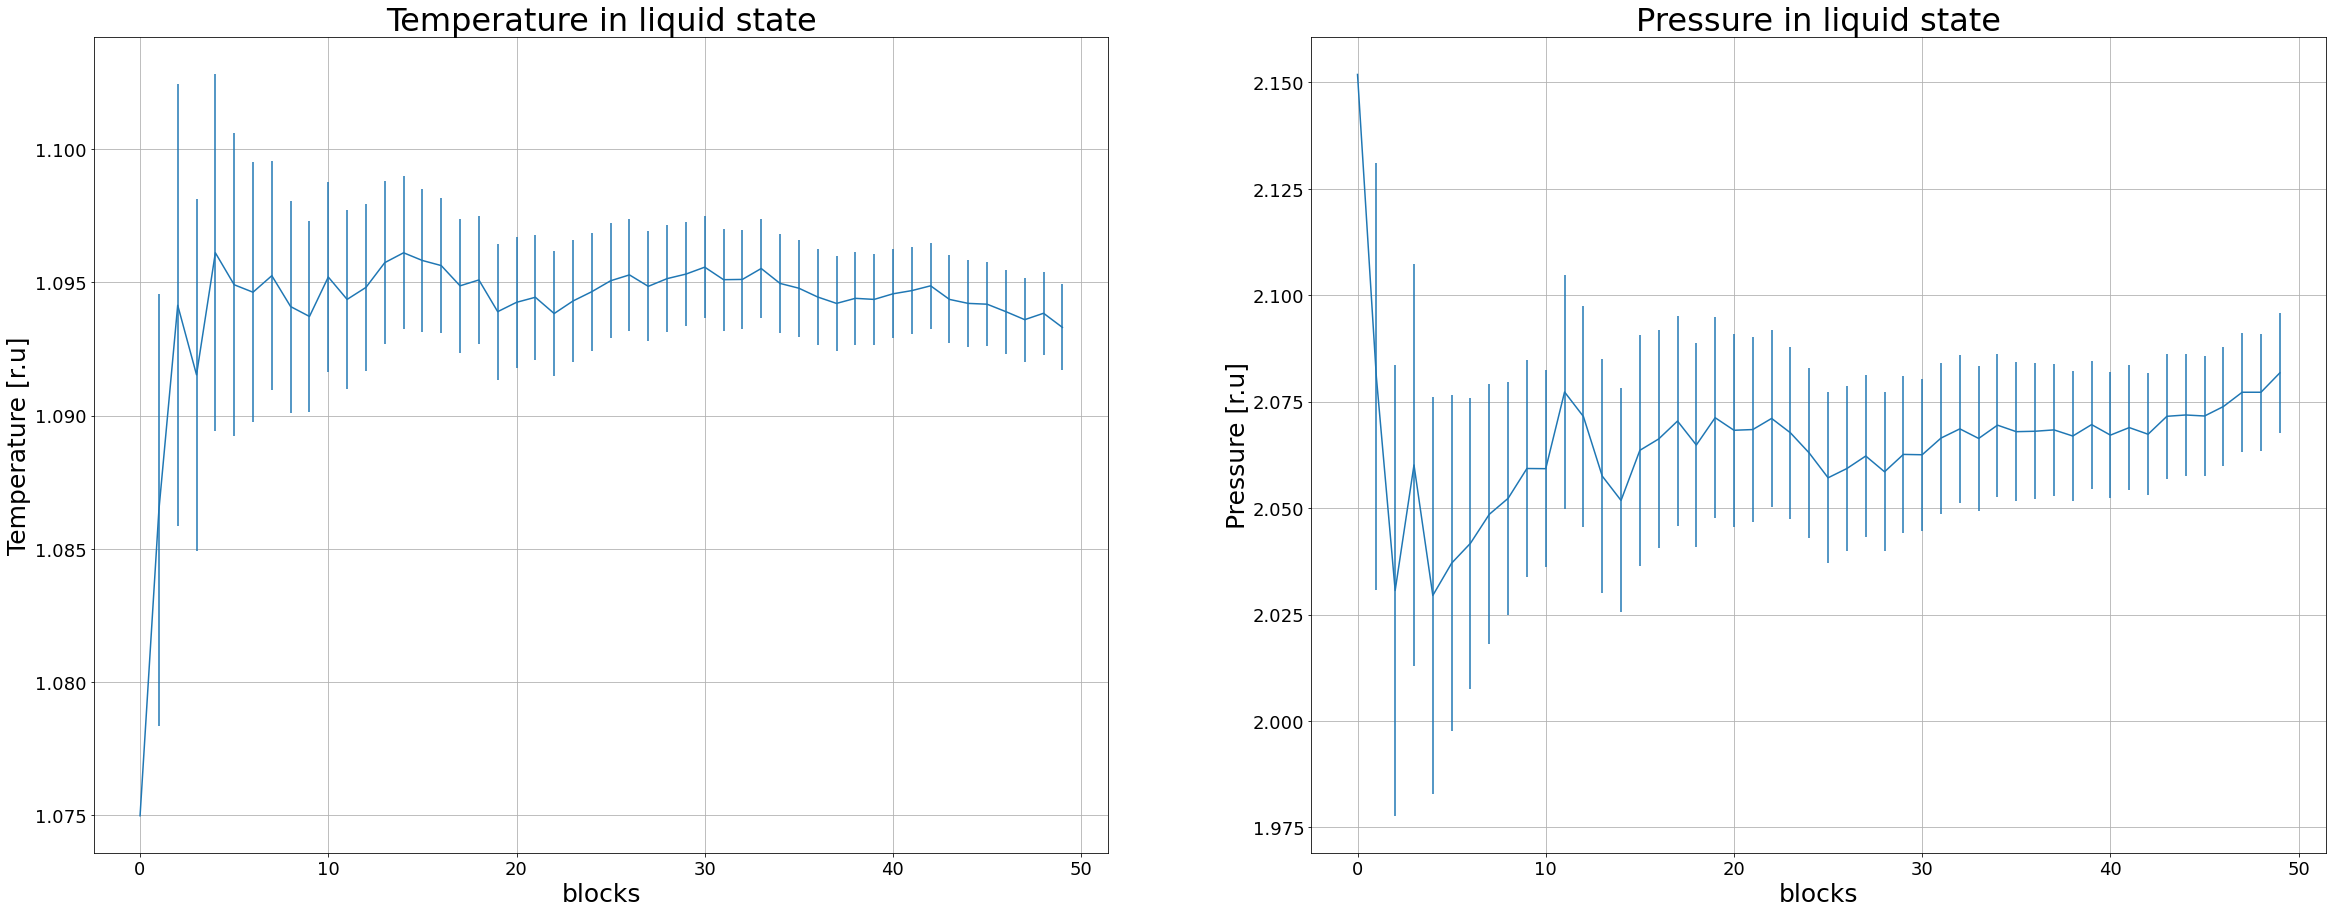

In [11]:
ekin_liquid, ekin_err_l = np.loadtxt("output_folder/liquid_ekin.dat", unpack=True, usecols=(2,3))
etot_liquid, etot_err_l = np.loadtxt("output_folder/liquid_etot.dat", unpack=True, usecols=(2,3))
epot_liquid, epot_err_l = np.loadtxt("output_folder/liquid_epot.dat", unpack=True, usecols=(2,3))
temp_liquid, temp_err_l = np.loadtxt("output_folder/liquid_temp.dat", unpack=True, usecols=(2,3))
pres_liquid, pres_err_l = np.loadtxt("output_folder/liquid_pres.dat", unpack=True, usecols=(2,3))

blocks = np.arange(50)

fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(30 , 12))
ax0.errorbar(blocks, ekin_liquid , yerr= ekin_err_l)
ax1.errorbar(blocks, epot_liquid , yerr= epot_err_l)
ax2.errorbar(blocks, etot_liquid , yerr= etot_err_l)

ax0.set_ylabel("Kinetic energy [r.u]", fontsize=18)
ax1.set_ylabel("Potential energy [r.u]", fontsize=18)
ax2.set_ylabel("Total energy [r.u]", fontsize=18)
ax0.set_title("Kinetic energy in lquid state",  fontsize=28)
ax1.set_title("Potential energy in liquid state",  fontsize=28)
ax2.set_title("Total energy in liquid state",  fontsize=28)

for i in range(3):
    globals()['ax'+str(i)].set_xlabel("blocks", fontsize=18)
    globals()['ax'+str(i)].grid(True)

fig, [ax4, ax5] = plt.subplots(1,2, figsize=(40 , 15))
ax4.errorbar(blocks, temp_liquid , yerr= temp_err_l)
ax5.errorbar(blocks, pres_liquid, yerr= pres_err_l)

ax4.set_ylabel("Temperature [r.u]", fontsize=25)
ax5.set_ylabel("Pressure [r.u]", fontsize=25)
ax4.set_title("Temperature in liquid state",  fontsize=32)
ax5.set_title("Pressure in liquid state",  fontsize=32)
for i in range(2):
    globals()['ax'+str(i+4)].set_xlabel("blocks", fontsize=25)
    globals()['ax'+str(i+4)].grid(True)

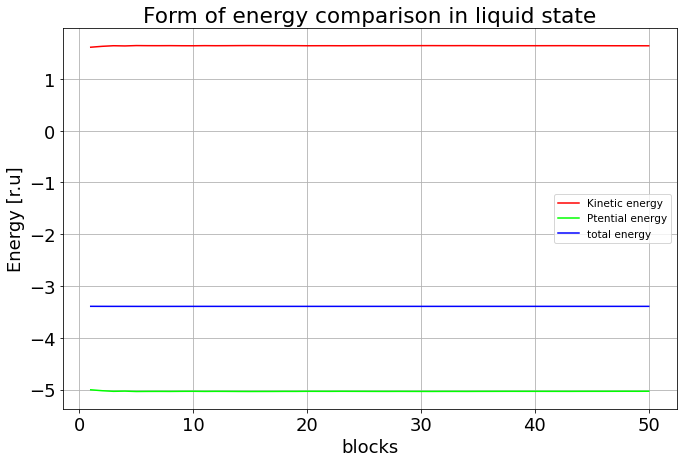

In [13]:
plt.plot(blocks+1, ekin_liquid, label="Kinetic energy", color= "red")
plt.plot(blocks+1, epot_liquid, label="Ptential energy", color= "lime")
plt.plot(blocks+1, etot_liquid, label="total energy", color= "blue")

plt.legend(loc=5, fontsize='xx-small')
plt.xlabel("blocks")
plt.ylabel("Energy [r.u]")
plt.title("Form of energy comparison in liquid state")
plt.grid(True)
plt.show()

In questo caso ho simulato l'evoluzione di un sistiema di dinamica molecolare di Argon allo stato liquido ad una temperatura $T=1.1\:r.u = 132 \: K$, una densità $\rho = 0.8 \:r.u \approx 20\cdot 10^{27} \:m^{-3}$ ed un raggio di cut-off $r_c = 2.5 \: r.u \approx 0.85 \:nm$.  

I primi grafici mostrano i valori medi, ottenuti tramite media blocchi con $2\cdot10^3$ estrazioni e $50$ blocchi, di: pressione, temperatura, energia potenziale, energia cinetica ed energia totale. 
L'ultimo grafico mostra un confronto delle tre energie e come esse rimangano costanti per ogni blocco, una volta evvenuta l'equilibrazione.

### <span style = "color:green" > Gas state </span>

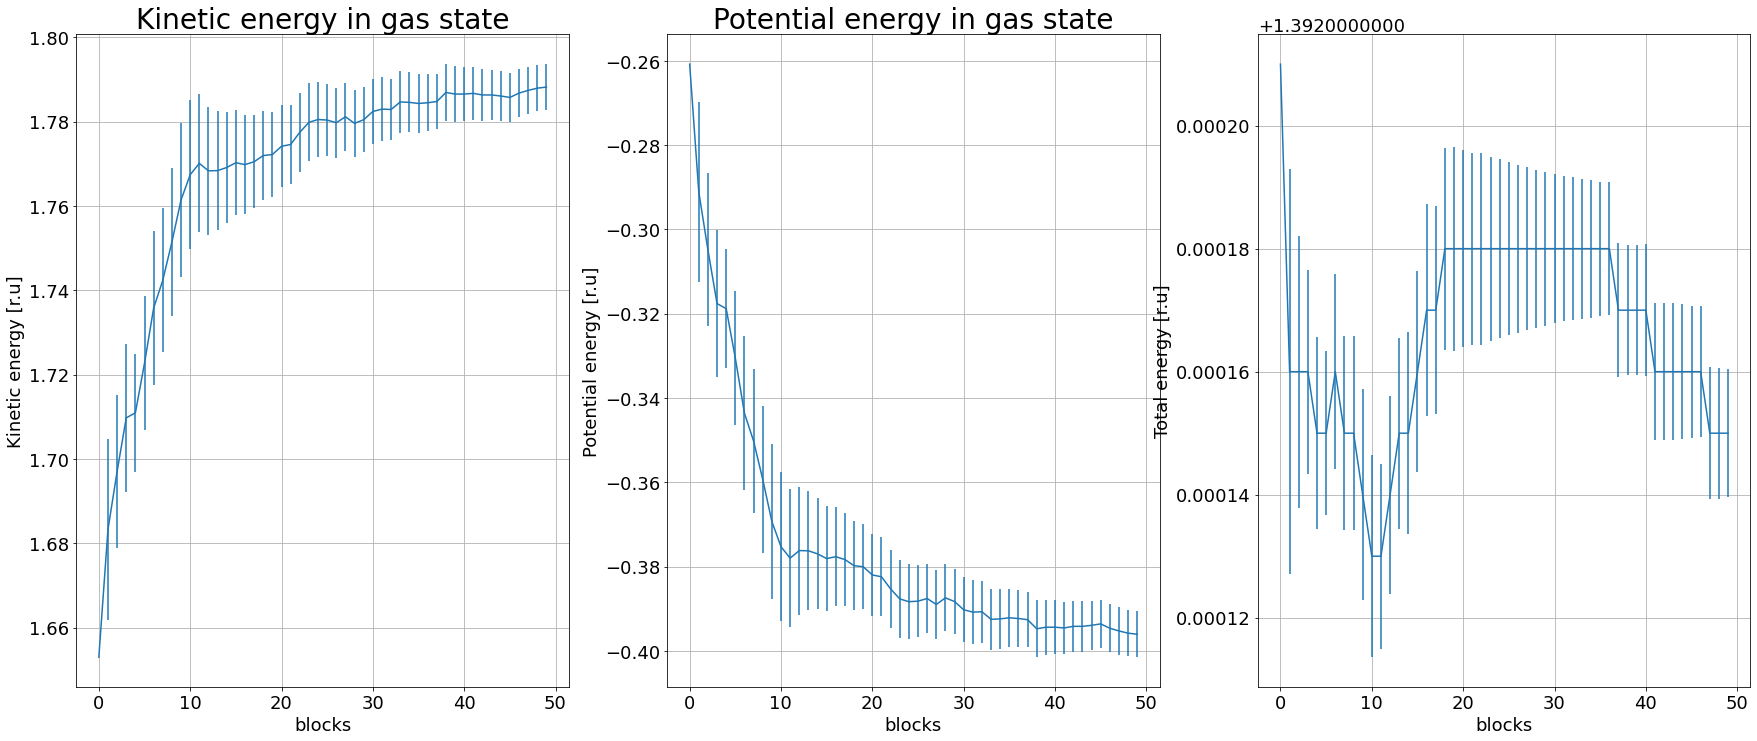

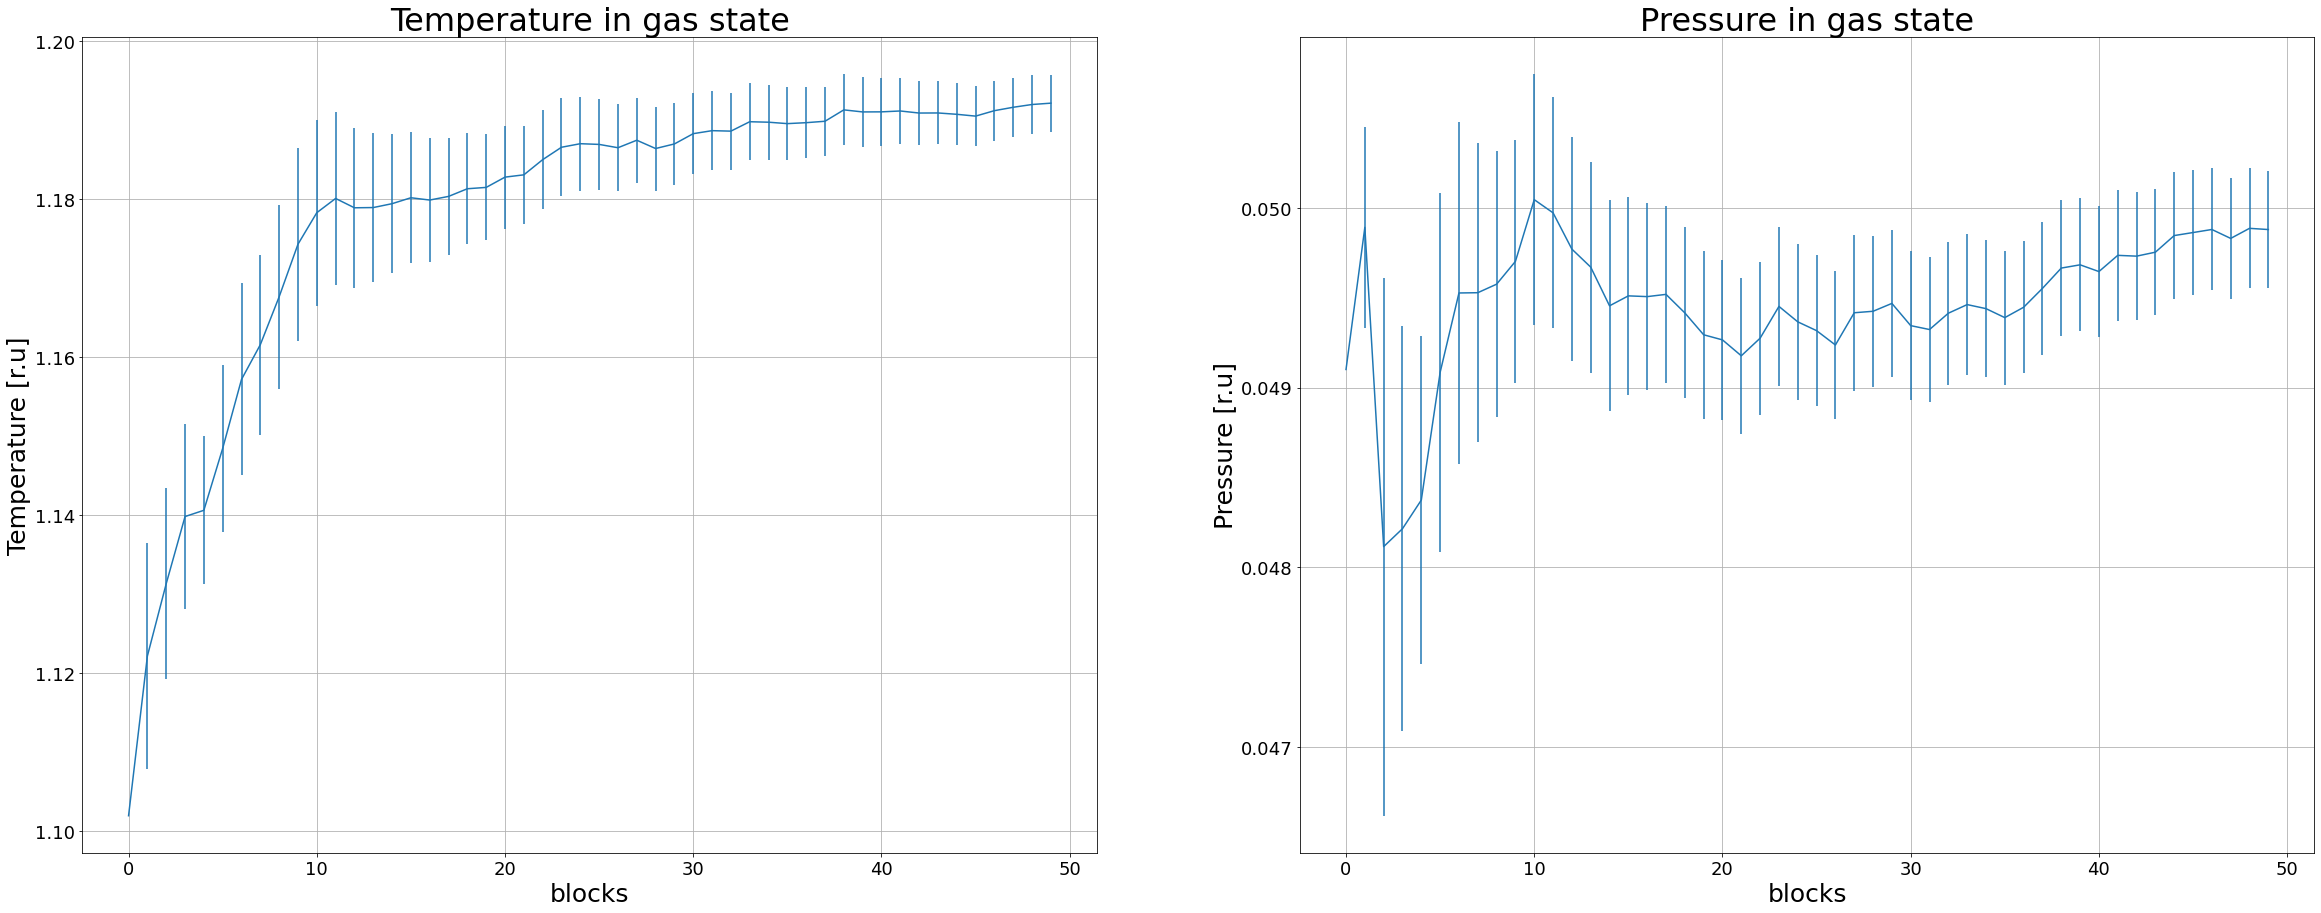

In [16]:
ekin_gas, ekin_err_g = np.loadtxt("output_folder/gas_ekin.dat", unpack=True, usecols=(2,3))
etot_gas, etot_err_g = np.loadtxt("output_folder/gas_etot.dat", unpack=True, usecols=(2,3))
epot_gas, epot_err_g = np.loadtxt("output_folder/gas_epot.dat", unpack=True, usecols=(2,3))
temp_gas, temp_err_g = np.loadtxt("output_folder/gas_temp.dat", unpack=True, usecols=(2,3))
pres_gas, pres_err_g = np.loadtxt("output_folder/gas_pres.dat", unpack=True, usecols=(2,3))

blocks = np.arange(50)

fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(30 , 12))
ax0.errorbar(blocks, ekin_gas , yerr= ekin_err_g)
ax1.errorbar(blocks, epot_gas , yerr= epot_err_g)
ax2.errorbar(blocks, etot_gas , yerr= etot_err_g)

ax0.set_ylabel("Kinetic energy [r.u]", fontsize=18)
ax1.set_ylabel("Potential energy [r.u]", fontsize=18)
ax2.set_ylabel("Total energy [r.u]", fontsize=18)
ax0.set_title("Kinetic energy in gas state",  fontsize=28)
ax1.set_title("Potential energy in gas state",  fontsize=28)
#ax2.set_title("Total energy in gas state",  fontsize=28)

for i in range(3):
    globals()['ax'+str(i)].set_xlabel("blocks", fontsize=18)
    globals()['ax'+str(i)].grid(True)

fig, [ax4, ax5] = plt.subplots(1,2, figsize=(40 , 15))
ax4.errorbar(blocks, temp_gas , yerr= temp_err_g)
ax5.errorbar(blocks, pres_gas , yerr= pres_err_g)

ax4.set_ylabel("Temperature [r.u]", fontsize=25)
ax5.set_ylabel("Pressure [r.u]", fontsize=25)
ax4.set_title("Temperature in gas state",  fontsize=32)
ax5.set_title("Pressure in gas state",  fontsize=32)
for i in range(2):
    globals()['ax'+str(i+4)].set_xlabel("blocks", fontsize=25)
    globals()['ax'+str(i+4)].grid(True)

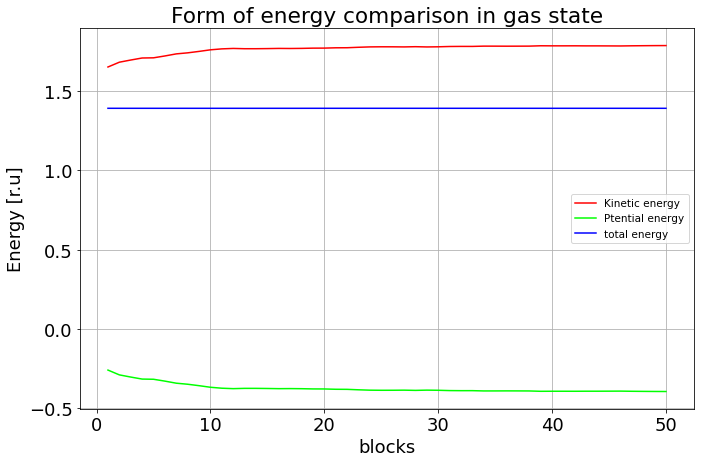

In [19]:
plt.plot(blocks+1, ekin_gas, label="Kinetic energy", color= "red")
plt.plot(blocks+1, epot_gas, label="Ptential energy", color= "lime")
plt.plot(blocks+1, etot_gas, label="total energy", color= "blue")

plt.legend(loc=5, fontsize='xx-small')
plt.xlabel("blocks")
plt.ylabel("Energy [r.u]")
plt.title("Form of energy comparison in gas state")
plt.grid(True)
plt.show()

In questo caso ho simulato l'evoluzione di un sistiema di dinamica molecolare di Argon allo stato gassoso ad una temperatura $T=1.2\:r.u = 144 \: K$, una densità $\rho = 0.05 \:r.u \approx 1.3\cdot 10^{27} \:m^{-3}$ ed un raggio di cut-off $r_c = 5 \: r.u = 1.7 \:nm$.  

I primi grafici mostrano i valori medi, ottenuti tramite media blocchi con $2\cdot10^3$ estrazioni e $50$ blocchi, di pressione, temperatura, energia potenziale, energia cinetica ed energia totale. 
L'ultimo grafico mostra un confronto delle tre energie. In questo caso, a differenza dei precedenti, è ben visibile per i primi blocchi la decrescita dell'energia potenziale con la corrispondete crescita dell'energia cinetica, la conseguenza è un andamento costante dell'energia totale per tutti i blocchi, come stabilito dall'ipotesi di ensamble microcanonico.

Bisogna sottolineare che in queste simulazioni sono stati trascurati tutti gli effetti, di interazione oltre il raggio di cut-off. Essi darebbero termini di coda aggiuntivi nella stima dell'energia potenziale e totale.